<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment03** #

Name : 이현주

Student # : 20184060

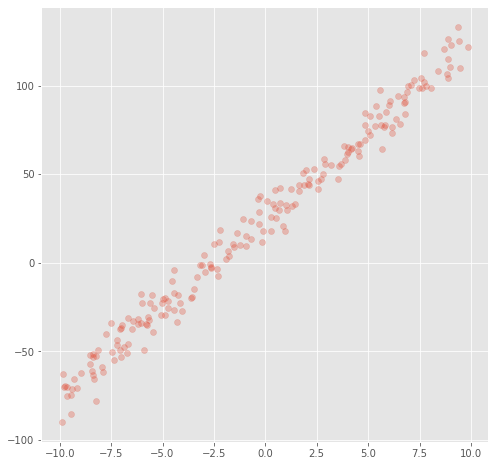

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.style.use(['ggplot'])

path = "assignment_03_data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

X= x_data

y = []

for i in range(200):
  line = []
  line.append(y_data[i])
  y.append(line)

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3)
plt.show()

In [0]:
X_b = np.c_[np.ones((200,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
X_new = np.array([[-100],[100]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

(-10.0, 10.0, -100.0, 100.0)

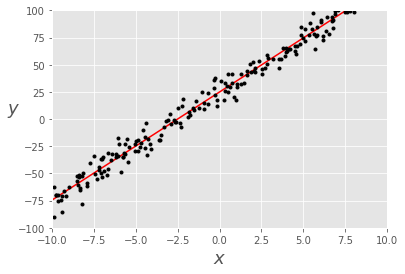

In [0]:
plt.plot(X_new,y_predict,'r-')
plt.plot(x_data,y_data,'b.', color = 'black')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10,10,-100,100])

In [0]:
#cost 함수의 수학적 정의
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [0]:
#theta 수학적 정의를 통해 gradient_descent 정의
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [0]:
#learning rate 0.01로 초기화
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

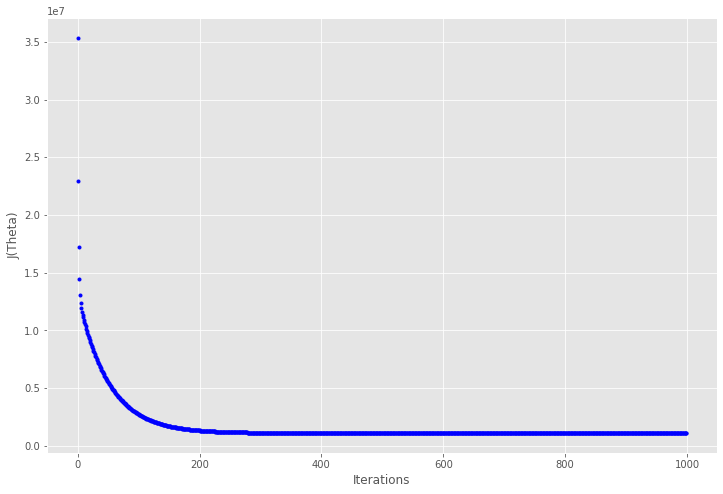

In [0]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

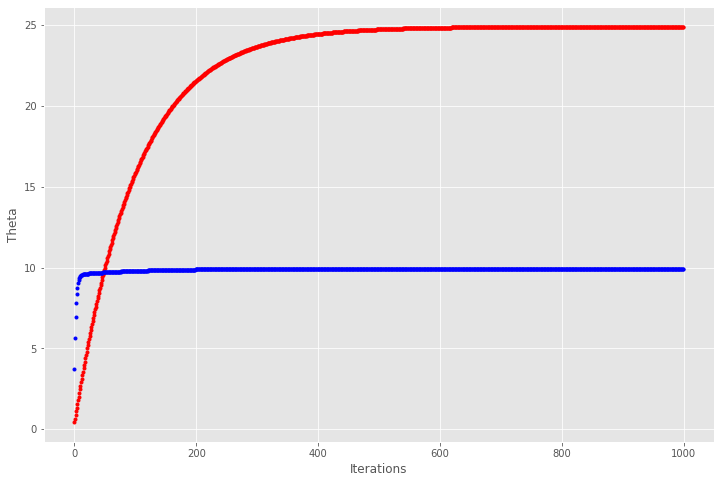

In [0]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'blue')


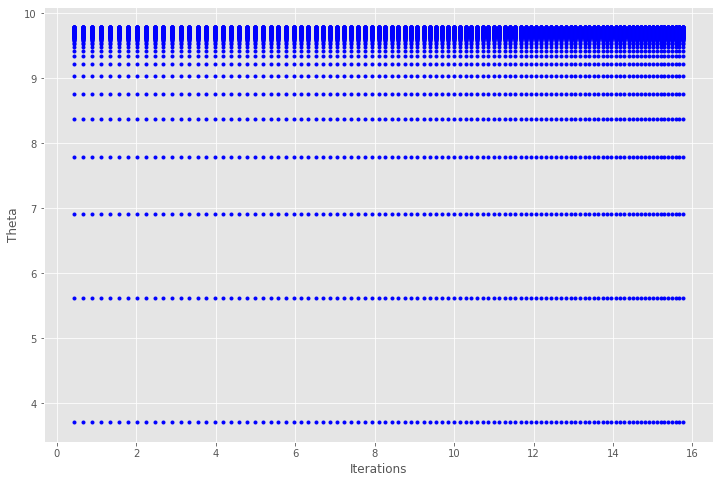

In [0]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')

n_iter = 100
x_history = np.zeros((n_iter,n_iter))
y_history = np.zeros((n_iter,n_iter))

for it in range(n_iter):
  for it2 in range(n_iter):
    x_history[it][it2] = theta0_history[it]
    y_history[it][it2] = theta1_history[it]
    _=ax.plot(theta0_history[it],theta1_history[it2],'b.', color = 'blue')

# objection fuction의 수학적 정의
def  cal_objection(theta0, theta1,X,y):
    m = len(y)

    objection = (1/2*m) * np.sum(np.square(theta0 + theta1*X -y))
    return objection

ValueError: ignored

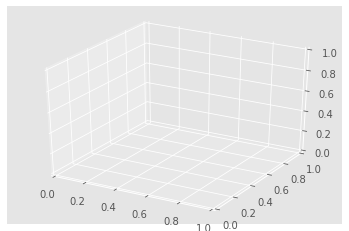

In [0]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

z_history = np.zeros((n_iter,n_iter))

for it in range(n_iter):
  for it2 in range(n_iter):
        z_history[it][it2] = cal_objection(theta0_history[it], theta1_history[it2],X,y)
        # ax.plot(x_history[it][it2], y_history[it][it2], z_history[it][it2], label='parametric curve')
        # ax.legend()

ax.plot(x_history, y_history, z_history, label='parametric curve')
ax.legend()

plt.show()

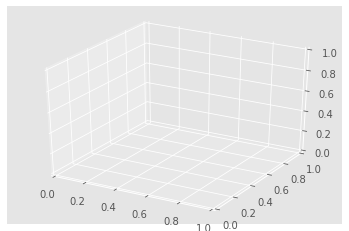

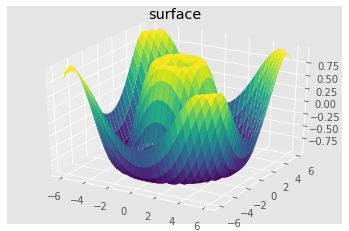

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');